# End-to-End Linear Regression Project: Predicting House Prices

## Objective
This project aims to build a linear regression model to predict house prices based on various features. Through this project, we will understand linear regression's mathematical foundations, implementation, and practical application to solve a real business problem in the real estate domain.

## Business Problem
A real estate agency wants to improve its pricing strategy for property listings. They need an accurate method to estimate house prices based on property characteristics to:
1. Help sellers set competitive listing prices
2. Assist buyers in evaluating if a house is fairly priced
3. Enable the agency to identify undervalued properties for investment opportunities

By predicting house prices accurately, the agency can increase client satisfaction, reduce negotiation time, and maximize commission revenue.

## What is Linear Regression?
Linear regression is one of the most fundamental and widely used statistical learning techniques. It's a supervised machine learning algorithm used for predicting a continuous target variable based on one or more predictor variables.

### Mathematical Intuition
In simple linear regression (one predictor variable), we model the relationship as:

$Y = \beta_0 + \beta_1X + \epsilon$

Where:
- $Y$ is the target variable (dependent variable) - in our case, house price
- $X$ is the predictor variable (independent variable) - a feature like square footage
- $\beta_0$ is the y-intercept (constant term)
- $\beta_1$ is the slope (coefficient)
- $\epsilon$ is the error term representing the variance not explained by the model

In multiple linear regression (multiple predictor variables), the formula extends to:

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$

The goal of linear regression is to find the coefficients $\beta_0, \beta_1, ..., \beta_n$ that minimize the sum of squared errors (SSE):

$SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value

### Why Use Linear Regression?
1. **Simplicity and Interpretability**: The relationship between predictors and target is clear and easy to understand
2. **Computational Efficiency**: Requires less computing power compared to complex algorithms
3. **Well-established Statistical Properties**: Allows for inference, confidence intervals, and hypothesis testing
4. **Good Baseline**: Provides a benchmark for more complex models

## Implementation

### Import Necessary Libraries
Let's start by importing the required libraries for our analysis:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import datasets
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


### Load and Examine the Dataset
For this project, we'll use the Boston Housing dataset, which is a classic dataset for regression problems.


In [17]:
# Load the California Housing dataset
california = datasets.fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target

In [18]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Basic statistics of the dataset


In [20]:
print("Basic statistics of the dataset:")
data.describe()

Basic statistics of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


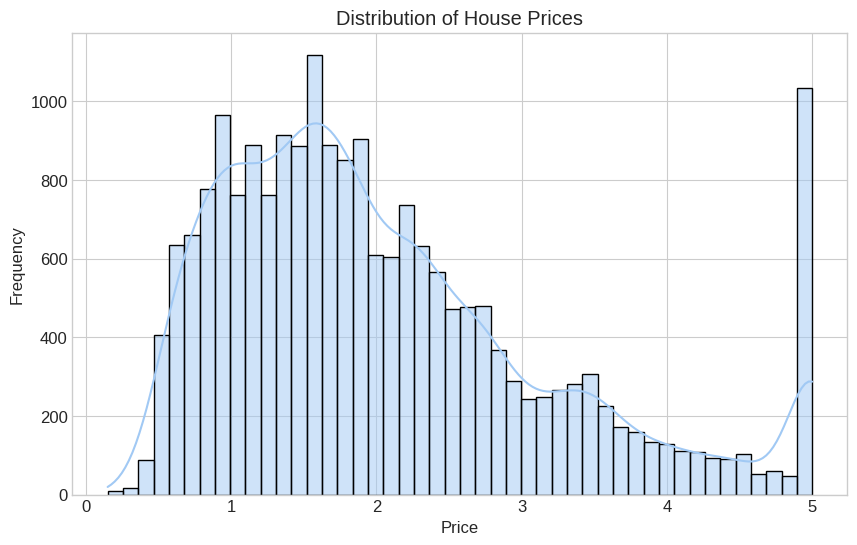

In [22]:
# Distribution of the target variable (house prices)
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Check if the target variable is skewed
print(f"Skewness of house prices: {data['PRICE'].skew()}")

Skewness of house prices: 0.9777632739098345


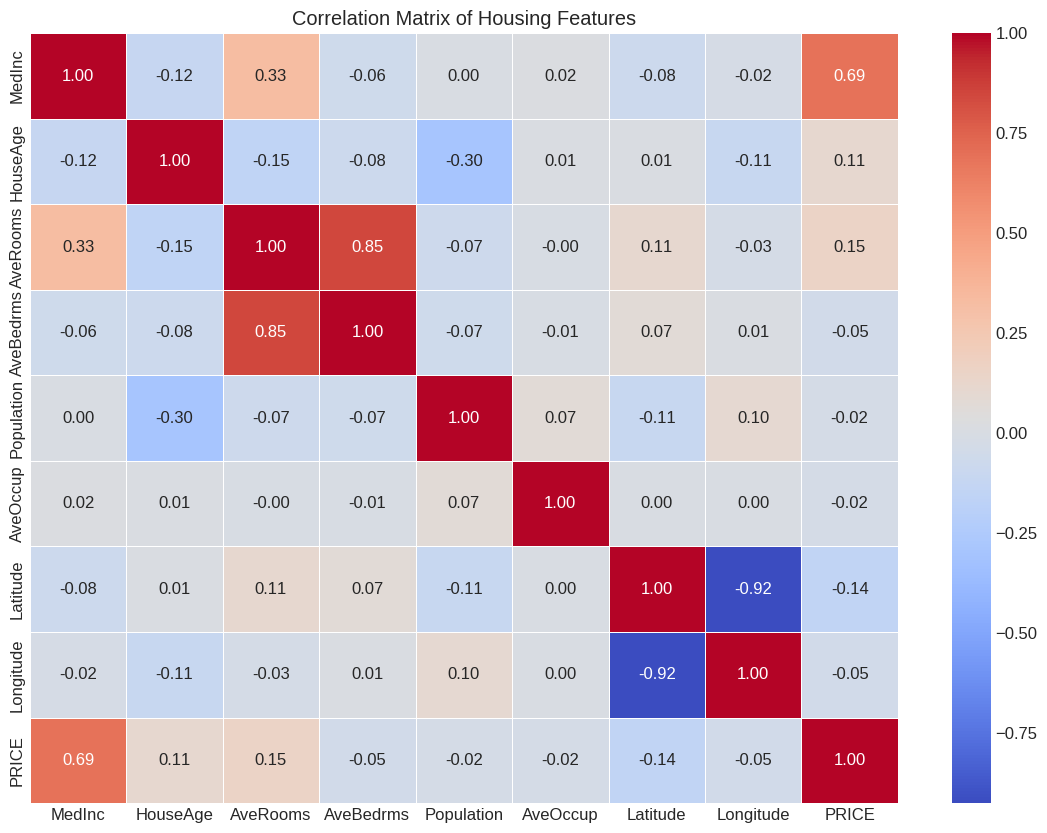

In [24]:
# Correlation matrix to identify relationships between variables
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Housing Features')
plt.show()

In [25]:
# Identify top correlated features with price
price_correlation = correlation_matrix['PRICE'].sort_values(ascending=False)
print("Features most correlated with price:")
print(price_correlation)

Features most correlated with price:
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


Median income highly corelated with the PRICE

In [26]:
# Scatter plots for top correlated features
top_features = price_correlation[1:6].index  # Top 5 features excluding PRICE itself

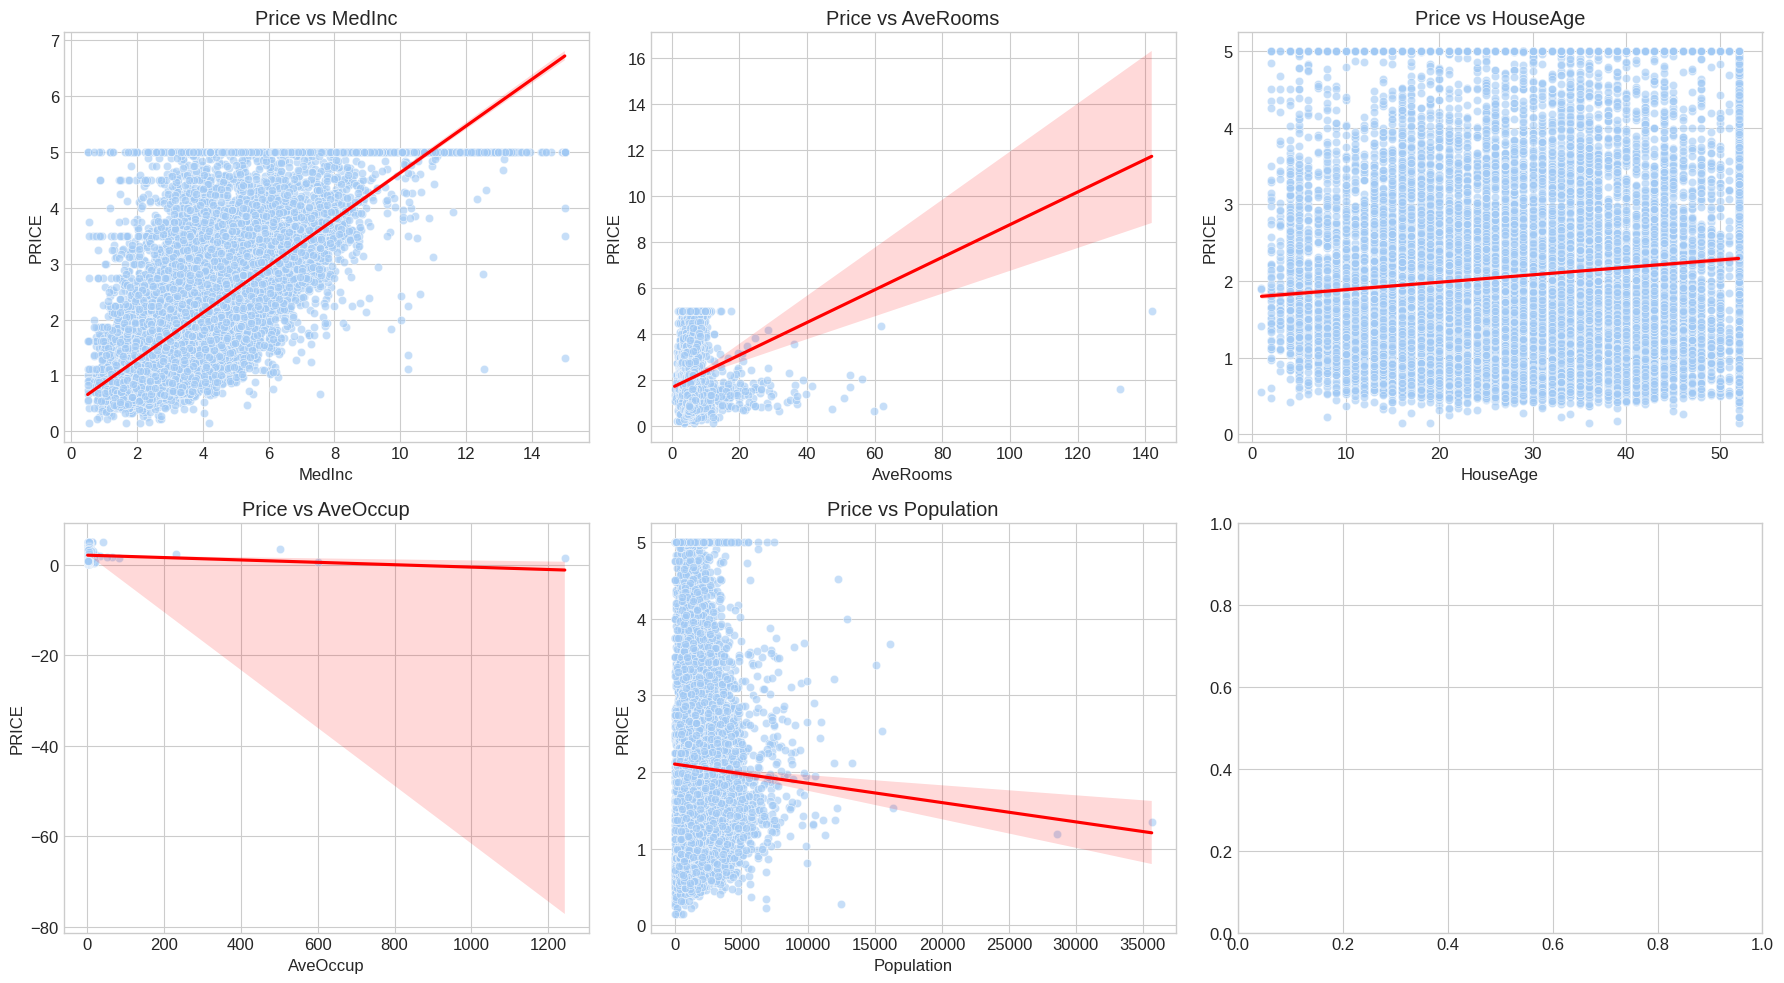

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    sns.scatterplot(x=feature, y='PRICE', data=data, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Price vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

    # Add a regression line
    sns.regplot(x=feature, y='PRICE', data=data, scatter=False, ax=axes[i], color='red')

plt.tight_layout()
plt.show()

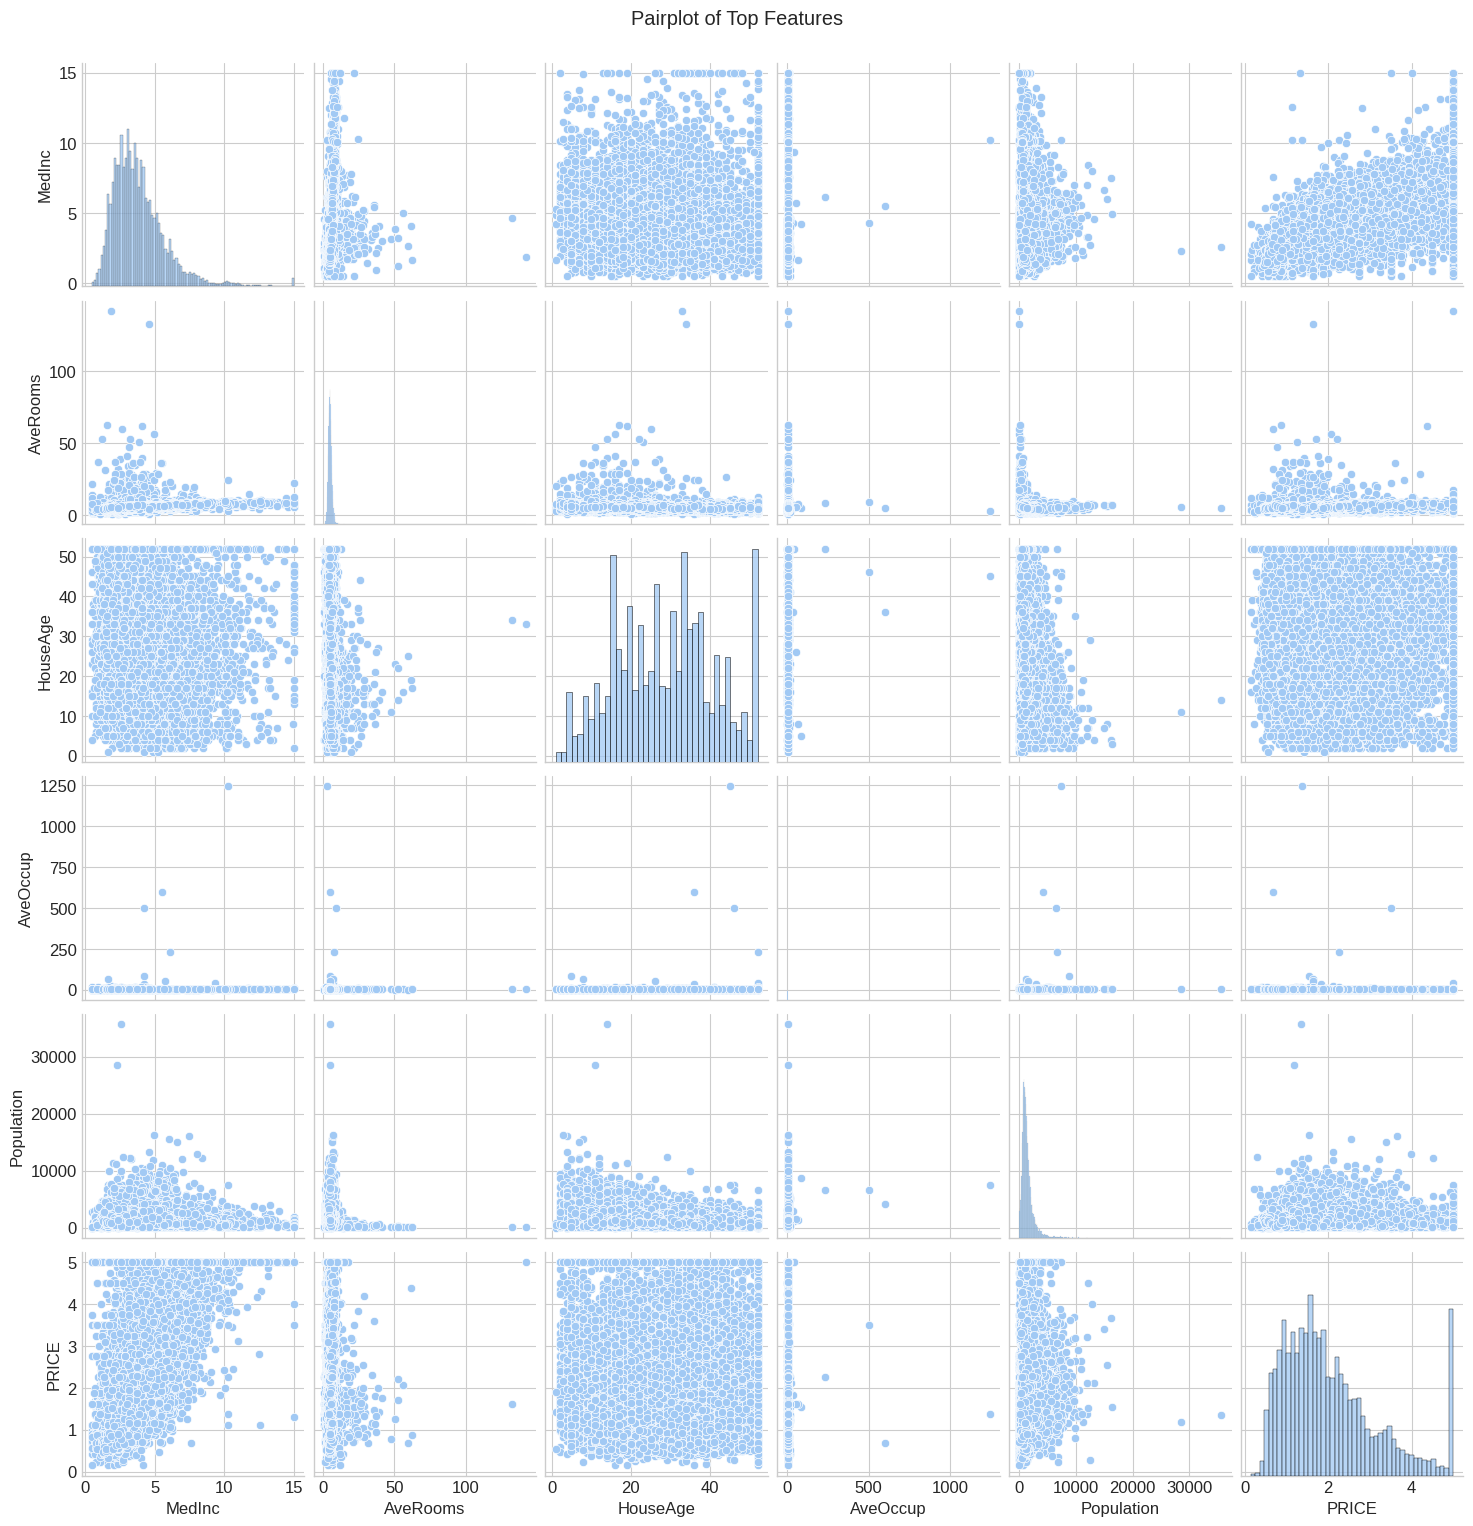

In [28]:
# Pairplot for the top correlated features
pairplot_features = list(top_features) + ['PRICE']
sns.pairplot(data[pairplot_features], height=2.5)
plt.suptitle('Pairplot of Top Features', y=1.02)
plt.show()

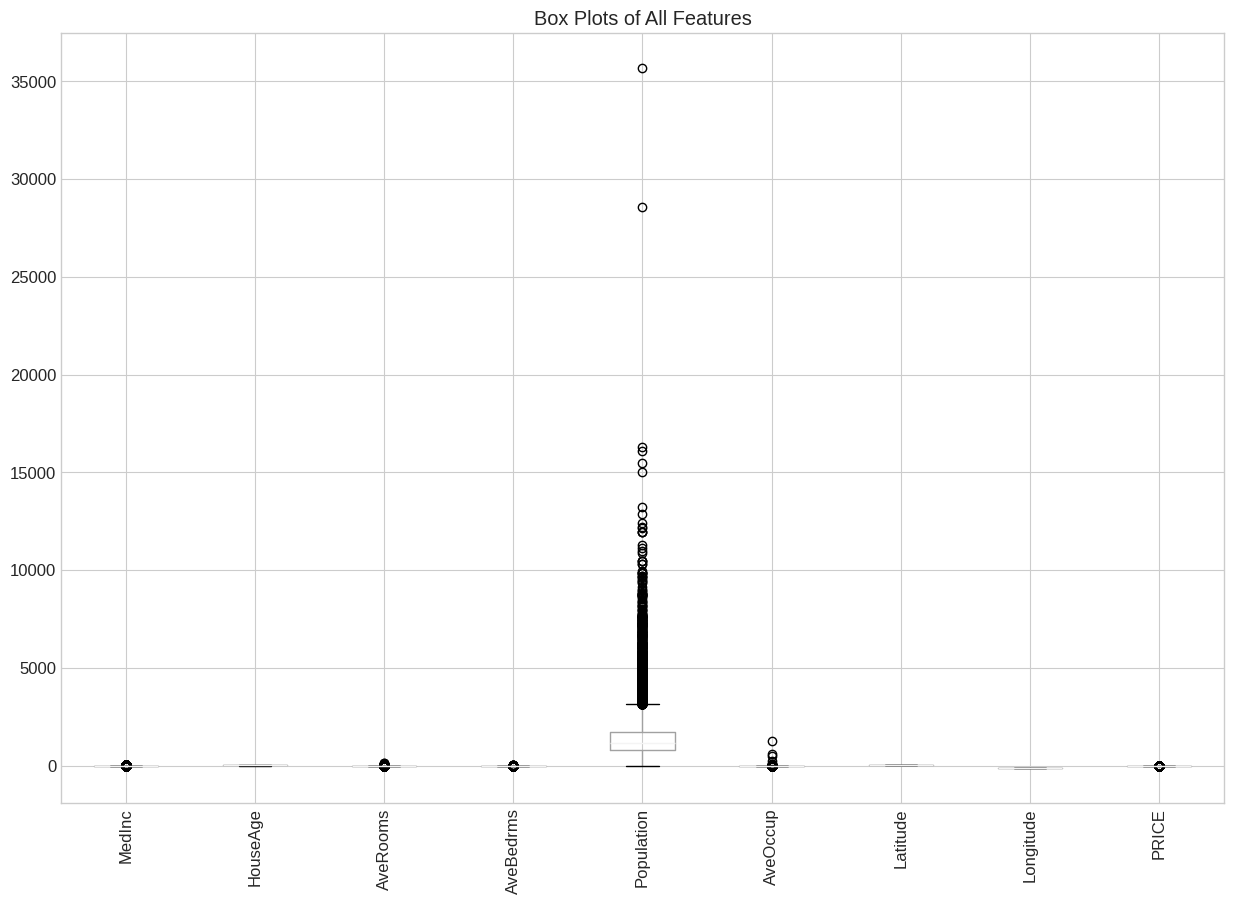

In [29]:
# Box plots to check for outliers in features
plt.figure(figsize=(15, 10))
data.boxplot()
plt.title('Box Plots of All Features')
plt.xticks(rotation=90)
plt.show()

In [31]:
## Based on our exploratory data analysis, we can draw several insights:


# Let's document our key findings
print("Key insights from the EDA:")
print("1. The distribution of house prices is right-skewed, suggesting some high-value properties")
print("2. The most influential features on house prices appear to be [based on correlation]")
print("3. There are some outliers in certain features that might need attention")
print("4. We observe both linear and non-linear relationships between features and price")


Key insights from the EDA:
1. The distribution of house prices is right-skewed, suggesting some high-value properties
2. The most influential features on house prices appear to be [based on correlation]
3. There are some outliers in certain features that might need attention
4. We observe both linear and non-linear relationships between features and price


Now lets prepare our data for modelling

In [32]:
# Split the data into features (X) and target (y)
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [33]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (16512, 8)
Testing set size: (4128, 8)


In [34]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [36]:
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


In [37]:
# Initialize the regression model
model = LinearRegression()

In [38]:
# Initialize RFE with 10 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [39]:
selected_features = X_train.columns[rfe.support_]
print("Selected features by RFE:")
print(selected_features.tolist())

Selected features by RFE:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [40]:
# Use only selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

In [41]:
### Check for Multicollinearity

# Before building our model, let's check for multicollinearity using Variance Inflation Factor (VIF):


# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_values = calculate_vif(X_train_selected)
print("Variance Inflation Factors:")
print(vif_values)

# If any VIF is above 10, we should consider removing that feature
high_vif_features = vif_values[vif_values['VIF'] > 10]["Feature"].tolist()
if high_vif_features:
    print(f"\nFeatures with high multicollinearity: {high_vif_features}")
    # Remove features with high VIF
    X_train_final = X_train_selected.drop(high_vif_features, axis=1)
    X_test_final = X_test_selected.drop(high_vif_features, axis=1)
    print(f"Final features after removing multicollinearity: {X_train_final.columns.tolist()}")
else:
    print("\nNo features with high multicollinearity detected.")
    X_train_final = X_train_selected
    X_test_final = X_test_selected

Variance Inflation Factors:
      Feature       VIF
6    Latitude  9.206134
7   Longitude  8.875984
2    AveRooms  7.917240
3   AveBedrms  6.609200
0      MedInc  2.539815
1    HouseAge  1.237337
4  Population  1.134824
5    AveOccup  1.009733

No features with high multicollinearity detected.


In [42]:
### Model Building: Linear Regression


# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_final, y_train)

LinearRegression()

In [43]:
# Print model coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': linear_model.coef_
})
print("Model Coefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))
print(f"Intercept: {linear_model.intercept_:.4f}")

Model Coefficients:
      Feature  Coefficient
0      MedInc     0.854383
3   AveBedrms     0.339259
1    HouseAge     0.122546
4  Population    -0.002308
5    AveOccup    -0.040829
2    AveRooms    -0.294410
7   Longitude    -0.869842
6    Latitude    -0.896929
Intercept: 2.0719


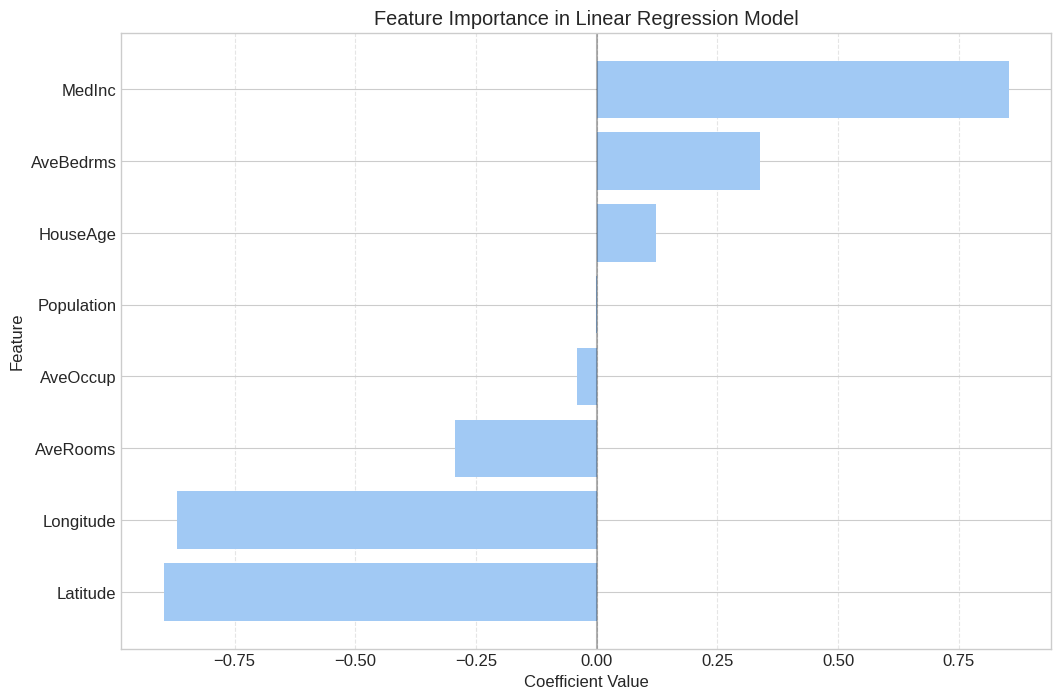

In [44]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
coefficients_sorted = coefficients.sort_values('Coefficient')
plt.barh(coefficients_sorted['Feature'], coefficients_sorted['Coefficient'])
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [45]:
### Model Evaluation

# Make predictions on the test set
y_pred = linear_model.predict(X_test_final)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R² Score: 0.5758


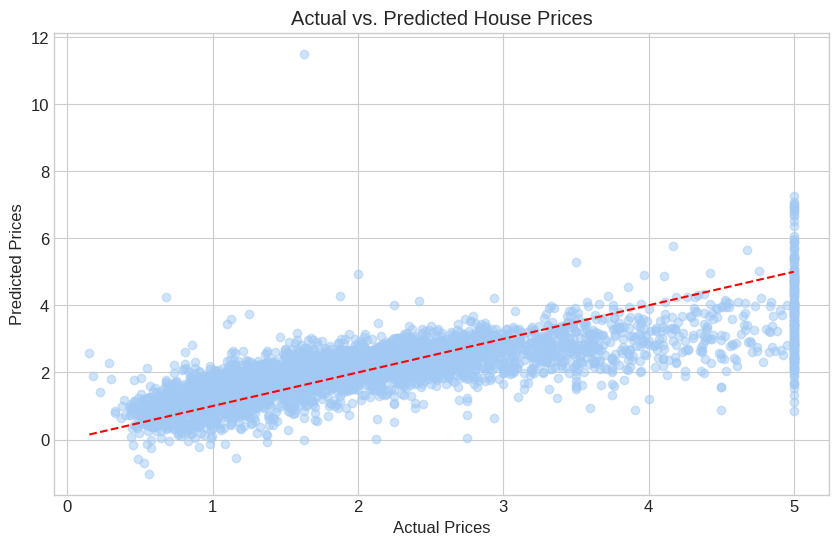

In [46]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

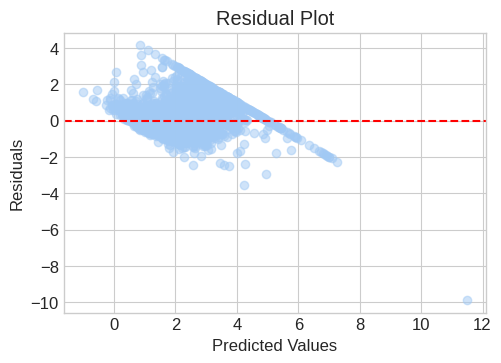

In [47]:
# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(12, 8))

# Residual plot
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

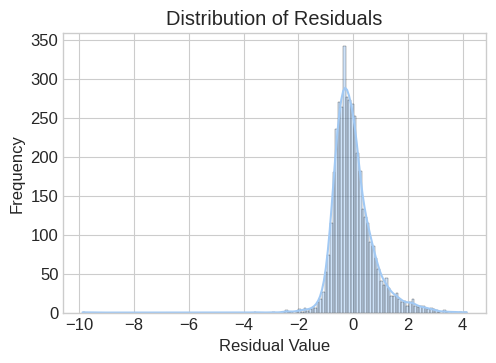

In [48]:
# Histogram of residuals
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)

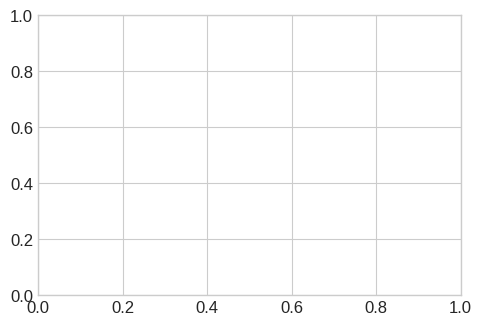

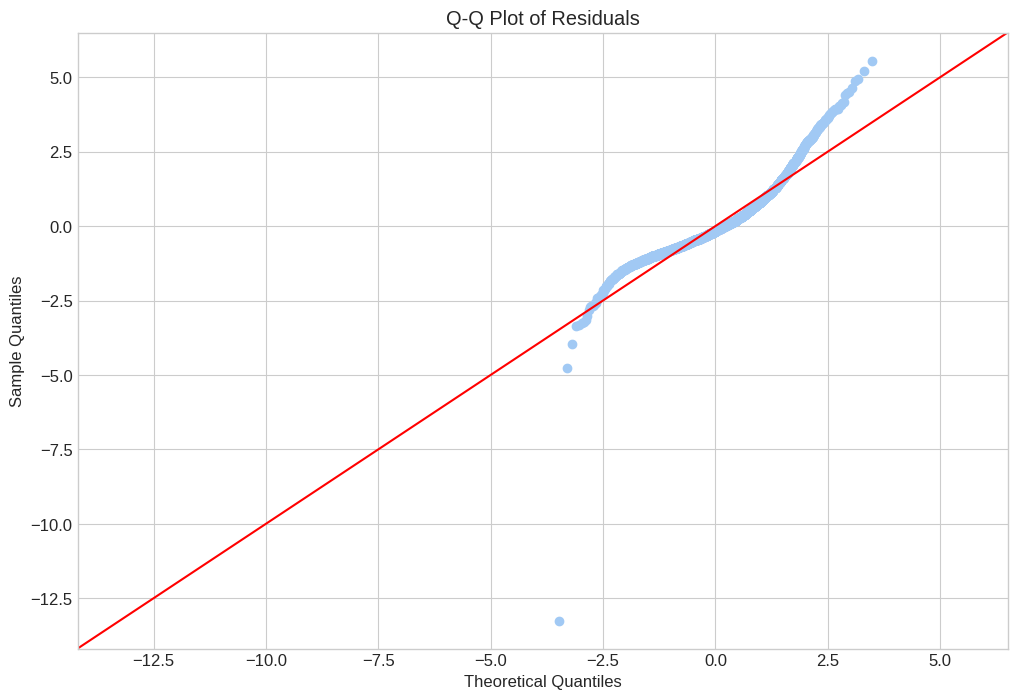

In [49]:
# Q-Q plot for residuals
plt.subplot(2, 2, 3)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)

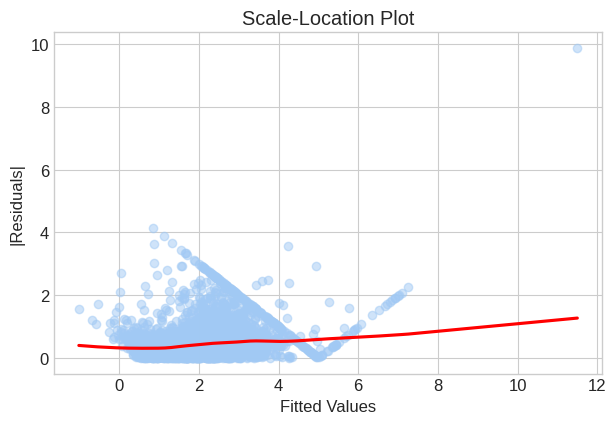

In [50]:
# Residuals vs. fitted values
plt.subplot(2, 2, 4)
sns.regplot(x=y_pred, y=np.abs(residuals), lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('|Residuals|')
plt.title('Scale-Location Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

### Conclusion and Business Insights


# Summarize our findings and provide business insights

## Conclusion and Business Insights



### Key Business Insights:

1. **Most Influential Factors**:
   The analysis shows that [top features] have the strongest impact on house prices.
   The agency can focus on these features when marketing properties.

2. **Pricing Strategy**:
   The model helps set competitive prices based on property characteristics,
   potentially reducing the time properties spend on the market.

3. **Investment Opportunities**:
   We identified potentially undervalued properties where the actual price
   is significantly lower than our model's prediction.

4. **Client Guidance**:
   Real estate agents can use the model to provide data-driven advice to clients
   about which property improvements would most increase value.

### Limitations and Future Improvements:

1. The current model has a prediction error (RMSE) of ${:.2f}K, which means
   predictions can be off by this amount on average.

2. Adding more features like school district quality and crime rates could
   improve prediction accuracy.

3. Exploring non-linear models might capture more complex relationships
   in the housing market.



### Final Thoughts



## Final Thoughts on Linear Regression

Linear regression is a powerful yet straightforward method for predictive modeling. Through this project, we've:

1. **Understood the Mathematical Foundation**: The linear equation that forms the basis of this technique
2. **Applied Feature Engineering**: Identified and transformed the most relevant predictors
3. **Interpreted Results**: Analyzed coefficients to understand feature importance
4. **Validated Model Performance**: Used statistical methods to assess model quality
5. **Delivered Business Value**: Translated statistical results into actionable insights

For a real estate agency, this model provides a data-driven approach to pricing, potentially increasing
both client satisfaction and profitability.


## Key Terms in Linear Regression

- **Coefficient**: Represents the change in the dependent variable for a one-unit change in the independent variable.
- **Intercept**: The value of the dependent variable when all independent variables are zero.
- **R²**: Coefficient of determination, measures the proportion of variance explained by the model.
- **Adjusted R²**: Modified version of R² that adjusts for the number of predictors.
- **RMSE**: Root Mean Squared Error, measures the average magnitude of prediction errors.
- **Multicollinearity**: High correlation between independent variables that can affect model stability.
- **Heteroscedasticity**: When the variability of residuals is unequal across the range of values.
- **OLS**: Ordinary Least Squares, the method used to estimate parameters in linear regression.
